In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [9]:
dataset = pd.read_csv('StudentPerformanceFactors.csv')


In [17]:

df.head(6800)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [25]:
#check the null
isnull = df.isnull()
print(isnull.sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [24]:
#drop the nulls
df.dropna(inplace=True)
isnull = df.isnull()
print(isnull.sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [27]:
#drop the dublictes
df.drop_duplicates(inplace=True)

In [36]:
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


In [ ]:
df['z_score'] = stats.zscore(df['Exam_Score'])

threshold = 3
outliers = df[(df['z_score'] > threshold) | (df['z_score'] < -threshold)]

df_no_outliers = df[(df['z_score'] <= threshold) & (df['z_score'] >= -threshold)].drop(columns=['z_score'])

print(df_no_outliers)

In [44]:

print(df_no_outliers.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6326.000000  6326.000000  6326.000000      6326.000000   
mean       19.978660    80.025134     7.035884        75.075877   
std         5.971396    11.549810     1.467695        14.385641   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        88.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6326.000000        6326.000000  6326.000000  
mean            1.495258           2.975498    67.078407  
std             1.234636           1.028080     3.348131  
min             0.000000           0.000000    56.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [45]:
print(df['Exam_Score'].value_counts())

Exam_Score
68     738
66     722
67     692
65     650
69     599
70     526
64     478
71     398
63     350
72     298
62     261
61     166
73     133
74     102
60      75
75      48
59      39
58      21
76      16
80       5
77       5
57       4
82       4
94       4
86       4
78       4
84       3
97       3
89       3
79       3
88       3
98       3
93       2
92       2
95       2
99       2
87       2
96       1
85       1
91       1
100      1
83       1
101      1
55       1
56       1
Name: count, dtype: int64


In [48]:
columns_of_interest = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities','Motivation_Level','Family_Income','Learning_Disabilities','Peer_Influence','Teacher_Quality','Gender',]
for column in columns_of_interest:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()


Value counts for Parental_Involvement:
Parental_Involvement
Medium    3251
High      1836
Low       1291
Name: count, dtype: int64

Value counts for Access_to_Resources:
Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64

Value counts for Extracurricular_Activities:
Extracurricular_Activities
Yes    3807
No     2571
Name: count, dtype: int64

Value counts for Motivation_Level:
Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64

Value counts for Family_Income:
Family_Income
Low       2582
Medium    2566
High      1230
Name: count, dtype: int64

Value counts for Learning_Disabilities:
Learning_Disabilities
No     5710
Yes     668
Name: count, dtype: int64

Value counts for Peer_Influence:
Peer_Influence
Positive    2553
Neutral     2495
Negative    1330
Name: count, dtype: int64

Value counts for Teacher_Quality:
Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64

Value counts

In [52]:
label_encoder = LabelEncoder()
df['Parental_Involvement'] = label_encoder.fit_transform(df['Parental_Involvement'])
df['Access_to_Resources'] = label_encoder.fit_transform(df['Access_to_Resources'])
df['Motivation_Level'] = label_encoder.fit_transform(df['Motivation_Level'])
df['Family_Income'] = label_encoder.fit_transform(df['Family_Income'])
df['Learning_Disabilities'] = label_encoder.fit_transform(df['Learning_Disabilities'])
df['Peer_Influence'] = label_encoder.fit_transform(df['Peer_Influence'])
df['Teacher_Quality'] = label_encoder.fit_transform(df['Teacher_Quality'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])


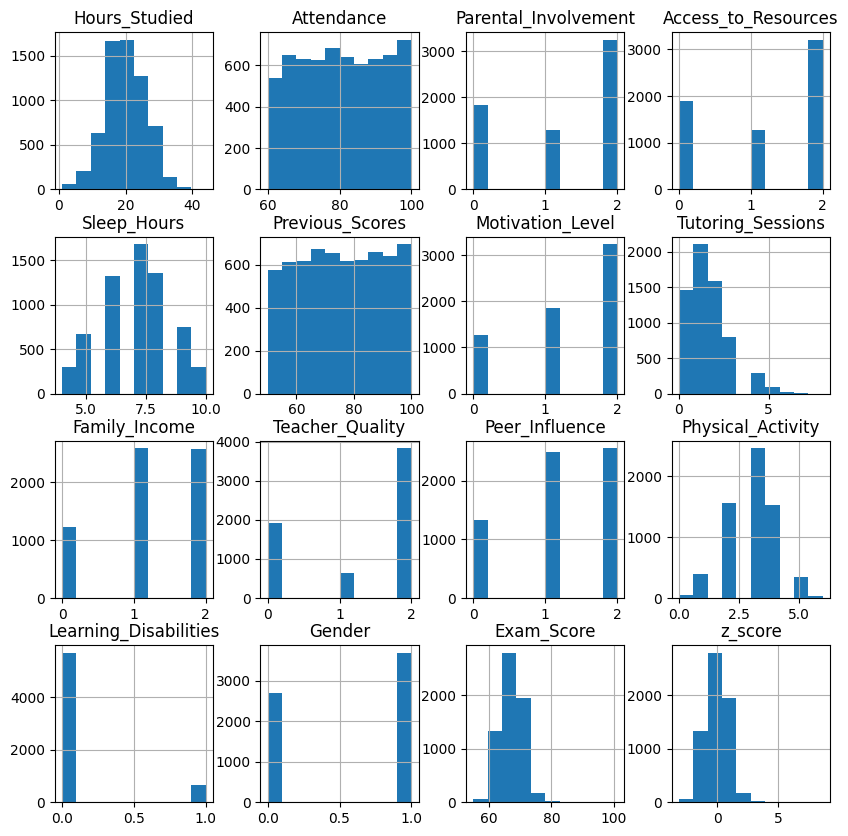

In [53]:
df.hist(figsize=(10, 10))
plt.show()

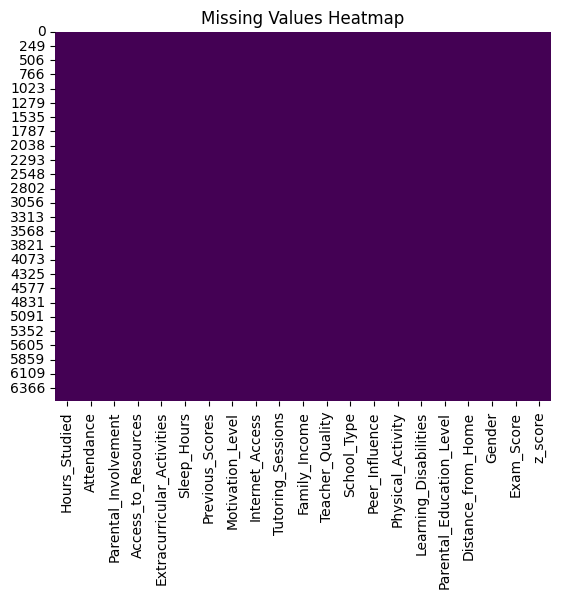

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()